In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread("../assets/imori.jpg")[:,:,::-1]

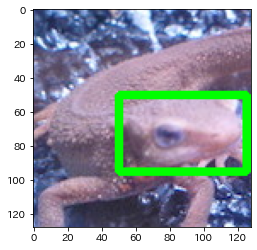

In [5]:
def draw_face(img, bbox):
    canvas = img.copy()
    canvas = cv2.line(canvas, tuple(bbox[0,0]), tuple(bbox[0,1]), (0,255,0), 3)
    canvas = cv2.line(canvas, tuple(bbox[0,0]), tuple(bbox[0,2]), (0,255,0), 3)
    canvas = cv2.line(canvas, tuple(bbox[0,1]), tuple(bbox[0,3]), (0,255,0), 3)
    canvas = cv2.line(canvas, tuple(bbox[0,2]), tuple(bbox[0,3]), (0,255,0), 3)
    return canvas

bbox = np.array([[[50,50], [125,50], [50, 95], [125, 95]]], np.float32)
img_bb = draw_face(img, bbox)
plt.imshow(img_bb)

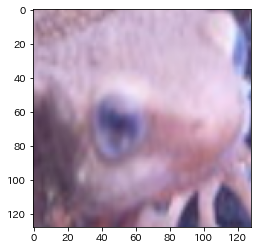

In [7]:
def perspective(img):
    h, w = img.shape[:2]
    # find matrix
    # input image points
    pts1 = np.array([[50,50], [125,50], [50, 95], [125, 95]], np.float32)
    # output image points
    pts2 = np.array([[0,0], [128,0], [0, 128], [128, 128]], np.float32)
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(img, M, (128,128))
    return dst

dst = perspective(img)    
plt.imshow(dst)